In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
x = tf.placeholder(tf.float32)
y = tf.placeholder(tf.float32)
c = tf.constant(5)

In [3]:
x

<tf.Tensor 'Placeholder:0' shape=<unknown> dtype=float32>

In [4]:
c*2

<tf.Tensor 'mul:0' shape=() dtype=int32>

In [5]:
square_node = x*x
mult_node = square_node*y
quadruple_node = 4*y
adder_node = mult_node + quadruple_node

In [6]:
square_node

<tf.Tensor 'mul_1:0' shape=<unknown> dtype=float32>

In [7]:
sess = tf.Session()

In [8]:
sess.run(c)

5

In [9]:
sess.run(x, feed_dict={x:10})

array(10., dtype=float32)

In [10]:
sess.run(square_node, feed_dict={x:5})

25.0

In [11]:
sess.run(adder_node, feed_dict={x:3, y:2})

26.0

In [12]:
f = x**2 * y + 4*y

In [13]:
f

<tf.Tensor 'add_1:0' shape=<unknown> dtype=float32>

In [14]:
sess.run(f, feed_dict={x:3, y:2})

26.0

In [15]:
with tf.Session() as sess:
    print("f(10,5)=", sess.run(f, feed_dict={x:10, y:5}))
    print("f(10,5)=", f.eval(feed_dict={x:10, y:5}))

f(10,5)= 520.0
f(10,5)= 520.0


In [16]:
np.random.seed(123)
x_train = np.arange(0,10,0.25)
y_train = 5*x_train + 1 + np.random.normal(0,1,size=x_train.shape)

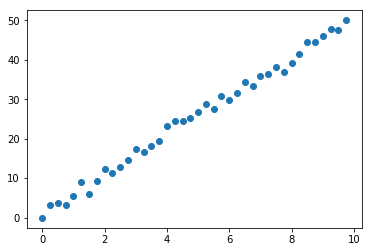

In [17]:
plt.scatter(x_train, y_train);

In [18]:
w = tf.Variable(0.0, dtype=tf.float32)
b = tf.Variable(0.0, dtype=tf.float32)

In [19]:
x = tf.placeholder(tf.float32)
y = tf.placeholder(tf.float32)

In [20]:
linear_model = w * x + b 

In [21]:
loss = tf.reduce_sum(tf.square(linear_model - y))

In [22]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.0005)

In [23]:
training_op = optimizer.minimize(loss)

In [24]:
init = tf.global_variables_initializer()

In [25]:
sess = tf.Session()

In [26]:
sess.run(init)

In [27]:
for i in range(20):
    sess.run(training_op, feed_dict={x: x_train, y: y_train})
    print("Iteration {}: w: {:0.5f}, b: {:0.5f}".format(i, sess.run(w), sess.run(b)))

Iteration 0: w: 6.58667, b: 1.01166
Iteration 1: w: 4.52043, b: 0.69846
Iteration 2: w: 5.16780, b: 0.80070
Iteration 3: w: 4.96417, b: 0.77262
Iteration 4: w: 5.02743, b: 0.78537
Iteration 5: w: 5.00699, b: 0.78527
Iteration 6: w: 5.01281, b: 0.78916
Iteration 7: w: 5.01040, b: 0.79176
Iteration 8: w: 5.01058, b: 0.79473
Iteration 9: w: 5.00995, b: 0.79754
Iteration 10: w: 5.00958, b: 0.80036
Iteration 11: w: 5.00913, b: 0.80315
Iteration 12: w: 5.00872, b: 0.80590
Iteration 13: w: 5.00830, b: 0.80863
Iteration 14: w: 5.00788, b: 0.81134
Iteration 15: w: 5.00747, b: 0.81401
Iteration 16: w: 5.00707, b: 0.81666
Iteration 17: w: 5.00667, b: 0.81928
Iteration 18: w: 5.00627, b: 0.82187
Iteration 19: w: 5.00588, b: 0.82444


In [28]:
X = np.vstack((x_train, np.ones_like(x_train))).transpose()

In [29]:
L = np.linalg.inv(X.transpose().dot(X))
R = X.transpose().dot(y_train)
L.dot(R)

array([4.9675195, 1.0749621])